# S50F-DNN Visualize Model Training History in Keras


Baseline Neural Network Model Performance

In [352]:
xseed=1982

from numpy.random import seed
seed(xseed)
from tensorflow import set_random_seed
set_random_seed(xseed)
import matplotlib.pyplot as plt

In [353]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [354]:
 # Binary Classification with Sonar Dataset: Baseline
import numpy
import pandas


from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier



from keras.layers import Dropout
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import Adadelta
from keras.constraints import maxnorm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from keras.callbacks import LearningRateScheduler

import joblib

import os
from datetime import datetime

import matplotlib.pyplot as plt

In [356]:
train_st='2007'
train_end='2017'

test_st='2018'
test_end='2020'

strategyName='long'

if strategyName=='long' :
 filename='ML-Long_S50M15_07To1Q20-Train.csv'
 filepath=os.path.abspath(f'D:\\Dev-Trong\\DataSet\\{filename}')
else:
  filename='ML-Short_S50M15_07To1Q20-Train_V2.csv'
  filepath=os.path.abspath(f'D:\\Dev-Trong\\DataSet\\short_v2\\{filename}')

print(filepath)


D:\Dev-Trong\DataSet\ML-Long_S50M15_07To1Q20-Train.csv


In [357]:
def CreateData(dfx,labelCol):
 
 X_df_temp =dfx.drop(columns=['open','high','low','close',labelCol])
 Y_df_temp = dfx[labelCol]

 Xtemp=X_df_temp.to_numpy()
 ytemp=Y_df_temp.to_numpy()

 return X_df_temp,Y_df_temp, Xtemp,ytemp

# Train Data by WFA

In [358]:
# load dataset

dataframe = pandas.read_csv(filepath,index_col="datetime", parse_dates=['datetime'],dayfirst=True)

print(dataframe.info())
dataframe.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69679 entries, 2007-01-03 09:45:00 to 2020-03-31 16:45:00
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open                    69679 non-null  float64
 1   high                    69679 non-null  float64
 2   low                     69679 non-null  float64
 3   close                   69679 non-null  float64
 4   indy_ma-550             69679 non-null  float64
 5   indy_ma-1100            69679 non-null  float64
 6   indy_hh-550             69679 non-null  float64
 7   indy_ll-550             69679 non-null  float64
 8   indy_mid-550            69679 non-null  float64
 9   indy_hh2-1100           69679 non-null  float64
 10  indy_ll2-1100           69679 non-null  float64
 11  indy_mid2-1100          69679 non-null  float64
 12  indy_macd110-440        69679 non-null  float64
 13  indy_signal110-440-110  69679 non-null  float64
 14  ind

(69679, 22)

In [359]:
labelName=dataframe.columns[-1]
print('Lable Column: ',labelName)

Lable Column:  LongSignal


In [360]:
df=dataframe[train_st:train_end]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57465 entries, 2007-01-03 09:45:00 to 2017-12-29 16:45:00
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open                    57465 non-null  float64
 1   high                    57465 non-null  float64
 2   low                     57465 non-null  float64
 3   close                   57465 non-null  float64
 4   indy_ma-550             57465 non-null  float64
 5   indy_ma-1100            57465 non-null  float64
 6   indy_hh-550             57465 non-null  float64
 7   indy_ll-550             57465 non-null  float64
 8   indy_mid-550            57465 non-null  float64
 9   indy_hh2-1100           57465 non-null  float64
 10  indy_ll2-1100           57465 non-null  float64
 11  indy_mid2-1100          57465 non-null  float64
 12  indy_macd110-440        57465 non-null  float64
 13  indy_signal110-440-110  57465 non-null  float64
 14  ind

In [361]:
df_test=dataframe[test_st:test_end]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12214 entries, 2018-01-03 09:45:00 to 2020-03-31 16:45:00
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open                    12214 non-null  float64
 1   high                    12214 non-null  float64
 2   low                     12214 non-null  float64
 3   close                   12214 non-null  float64
 4   indy_ma-550             12214 non-null  float64
 5   indy_ma-1100            12214 non-null  float64
 6   indy_hh-550             12214 non-null  float64
 7   indy_ll-550             12214 non-null  float64
 8   indy_mid-550            12214 non-null  float64
 9   indy_hh2-1100           12214 non-null  float64
 10  indy_ll2-1100           12214 non-null  float64
 11  indy_mid2-1100          12214 non-null  float64
 12  indy_macd110-440        12214 non-null  float64
 13  indy_signal110-440-110  12214 non-null  float64
 14  ind

In [362]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=xseed)

X_df,y_df,X_train,y_train=CreateData(df,labelName)
Xtest_df,ytest_df,X_test,y_test=CreateData(df_test,labelName)

In [363]:
display('X_df.tail(3)','Xtest_df.tail(3)')

,indy_ma-550,indy_ma-1100,indy_hh-550,indy_ll-550,indy_mid-550,indy_hh2-1100,indy_ll2-1100,indy_mid2-1100,indy_macd110-440,indy_signal110-440-110,indy_hist_macd110-440,indy_rsi25-ma20,indy_6ATRTrail_DC-110,cate_3trend-550_ma110,cate_2trend-1100_ma220,cate_rannkHL1100-ma66,cate_CombineTrend
datetime,,,,,,,,,,,,,,,,,
2017-12-29 16:15:00,1109.35,1099.06,1143.0,1080.6,1111.8,1143.0,1066.7,1104.85,20.76,21.99,-1.24,45.58,1134.08,3,1,3,3
2017-12-29 16:30:00,1109.42,1099.08,1143.0,1080.6,1111.8,1143.0,1066.7,1104.85,20.70,21.98,-1.29,45.79,1134.03,3,1,3,3
2017-12-29 16:45:00,1109.48,1099.10,1143.0,1080.6,1111.8,1143.0,1066.7,1104.85,20.61,21.97,-1.36,45.71,1133.95,3,1,3,3
,indy_ma-550,indy_ma-1100,indy_hh-550,indy_ll-550,indy_mid-550,indy_hh2-1100,indy_ll2-1100,indy_mid2-1100,indy_macd110-440,indy_signal110-440-110,indy_hist_macd110-440,indy_rsi25-ma20,indy_6ATRTrail_DC-110,cate_3trend-550_ma110,cate_2trend-1100_ma220,cate_rannkHL1100-ma66,cate_CombineTrend
datetime,,,,,,,,,,,,,,,,,
2020-03-31 16:15:00,797.37,909.22,969.7,623.0,796.35,1070.3,623.0,846.65,-34.58,-74.34,39.77,55.60,717.94,1,0,4,3
2020-03-31 16:30:00,796.96,908.92,969.7,623.0,796.35,1070.3,623.0,846.65,-33.73,-73.60,39.87,55.66,718.11,1,0,4,3
2020-03-31 16:45:00,796.55,908.62,968.6,623.0,795.80,1070.3,623.0,846.65,-32.84,-72.85,40.01,55.86,718.41,1,0,4,3


In [364]:
print(y_df.tail(3))
print(ytest_df.tail(3))

datetime
2017-12-29 16:15:00    1
2017-12-29 16:30:00    1
2017-12-29 16:45:00    1
Name: LongSignal, dtype: int64
datetime
2020-03-31 16:15:00    0
2020-03-31 16:30:00    0
2020-03-31 16:45:00    0
Name: LongSignal, dtype: int64


In [365]:
print(y_train[:10])
print(y_test[:10])

[0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1]


In [366]:
print("X-Train ",X_train.shape)

print("X-Test ",X_test.shape)

print("y-Train ",y_train.shape)

print("y-Test ",y_test.shape)

X-Train  (57465, 17)
X-Test  (12214, 17)
y-Train  (57465,)
y-Test  (12214,)


In [367]:
#scaler=StandardScaler().fit(X_train)
scaler=MinMaxScaler().fit(X_train)

Xtrain_scaled=scaler.transform(X_train)
Xtest_scaled=scaler.transform(X_test)


print("After scaled train \n",Xtrain_scaled[:2])
print("After scaled test \n",X_test[:2])



After scaled train 
 [[0.26430332 0.26829117 0.26456543 0.19477377 0.22043796 0.26132404
  0.19810508 0.22051945 0.33778556 0.29452815 0.5491141  0.30943089
  0.24627172 0.         0.         0.66666667 0.33333333]
 [0.26420617 0.26825399 0.26456543 0.19477377 0.22043796 0.26132404
  0.19810508 0.22051945 0.33778556 0.29460745 0.54883062 0.30845528
  0.24595248 0.         0.         0.66666667 0.33333333]]
After scaled test 
 [[ 1.10955e+03  1.09913e+03  1.14300e+03  1.08060e+03  1.11180e+03
   1.14300e+03  1.06670e+03  1.10485e+03  2.05500e+01  2.19600e+01
  -1.42000e+00  4.62400e+01  1.13366e+03  3.00000e+00  1.00000e+00
   3.00000e+00  3.00000e+00]
 [ 1.10963e+03  1.09916e+03  1.14300e+03  1.08060e+03  1.11180e+03
   1.14300e+03  1.06670e+03  1.10485e+03  2.04900e+01  2.19500e+01
  -1.46000e+00  4.68300e+01  1.13358e+03  3.00000e+00  1.00000e+00
   3.00000e+00  3.00000e+00]]


# Model Defination

In [368]:
'''
h1=17
h2=34
h3=17
'''
'''
h1=X_train.shape[1]
h2=X_train.shape[1]
'''
h1=50
h2=50


xpoch=200
xbatch=32

my_kernelInit='normal'


In [369]:
def model1():
 model = Sequential()  
  
 model.add(Dense(h1, input_dim=X_train.shape[1], kernel_initializer=my_kernelInit,activation='relu' ))

 model.add(Dense(h2, kernel_initializer=my_kernelInit,activation='relu'))

 #model.add(Dense(h3, kernel_initializer=my_kernelInit, activation="relu"))

 model.add(Dense(1, kernel_initializer=my_kernelInit, activation='sigmoid'))
  

 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 
 return model


In [ ]:
def model5():
 model = Sequential()  
  
 model.add(Dense(h1, input_dim=X_train.shape[1], kernel_initializer=my_kernelInit,activation='relu' ))

 model.add(Dense(h2, kernel_initializer=my_kernelInit,activation='relu'))

 #model.add(Dense(h3, kernel_initializer=my_kernelInit, activation="relu"))

 model.add(Dense(1, kernel_initializer=my_kernelInit, activation='sigmoid'))
  

 model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
 
 return model

In [370]:
def model5():
    
   
      
    model = Sequential()
    

    
    model.add(Dense(h1, input_dim=X_train.shape[1], kernel_initializer=my_kernelInit,activation='relu' ))
    
    model.add(Dense(h2, kernel_initializer=my_kernelInit, activation="relu"))
    
    #model.add(Dense(h3, kernel_initializer=my_kernelInit, activation="relu"))

    model.add(Dense(1, kernel_initializer=my_kernelInit, activation="sigmoid"))

    learning_rate = 0.1
    decay_rate = learning_rate / xpoch
    momentum = 0.8
    sgd_optimz = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)    
   
    
     # refer  machinelearningmastery/deep_learning_with_python.pdf 
    model.compile(loss="binary_crossentropy", optimizer=sgd_optimz , metrics=['accuracy'])

    return model

In [371]:

def model3():
    
   
      
    model = Sequential()
    
    model.add(Dropout(0.2, input_shape=(X_train.shape[1],)))
    
    model.add(Dense(h1, kernel_initializer=my_kernelInit, activation="relu", kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    
    model.add(Dense(h2, kernel_initializer=my_kernelInit, activation="relu", kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    
    #model.add(Dense(h3, kernel_initializer=my_kernelInit, activation="relu", kernel_constraint=maxnorm(3)))
    #model.add(Dropout(0.2))
    
    model.add(Dense(1, kernel_initializer=my_kernelInit, activation="sigmoid"))

    learning_rate = 0.1
    decay_rate = learning_rate / xpoch
    momentum = 0.8
    sgd_optimz = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)    
   
    
    
    model.compile(loss="binary_crossentropy", optimizer=sgd_optimz , metrics=['accuracy'])

    
    #optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    #optimizer = Adam(lr=0.05, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    #optimizer = SGD(lr=0.001, momentum=0.9, decay=0.01, nesterov=True)
    #optimizer = Adadelta(lr=2.0, rho=0.99, epsilon=1e-08, decay=0.0)
    
    return model

In [372]:
def model4():
    


 model = Sequential()  
  
 model.add(Dense(h1, input_dim=X_train.shape[1], kernel_initializer=my_kernelInit,activation='relu' ))

 model.add(Dense(h2, kernel_initializer=my_kernelInit,activation='relu'))

 #model.add(Dense(h3,kernel_initializer=my_kernelInit,activation='relu'))

 model.add(Dense(1, kernel_initializer=my_kernelInit, activation='sigmoid'))
 
 optz=SGD(lr=0.01,momentum=0.9)

 model.compile(loss='binary_crossentropy', optimizer=optz, metrics=['accuracy'])
 
 return model


In [373]:
history_modelList=[]

eval_train_modelList=[]
eval_test_modelList=[]


x_modelList=[]

models=[model1,model2,model3,model4]

#models=[model1,model2]

for x in models:
    print("model name=",x)
    model=x()
    
    history_model=model.fit(Xtrain_scaled,y_train,validation_data=(Xtest_scaled,y_test),epochs=xpoch,batch_size=xbatch)
    history_modelList.append(history_model)
    
    eval_train_modelList.append(model.evaluate(Xtrain_scaled,y_train))
    eval_test_modelList.append(model.evaluate(Xtest_scaled,y_test))
    
    x_modelList.append(x)

    


model name= <function model1 at 0x00000226CC233678>
Train on 57465 samples, validate on 12214 samples
Epoch 1/200
57465/57465 [==============================] - 4s 67us/step - loss: 0.3592 - accuracy: 0.8451 - val_loss: 0.4954 - val_accuracy: 0.7793
Epoch 2/200
57465/57465 [==============================] - 3s 58us/step - loss: 0.3041 - accuracy: 0.8736 - val_loss: 0.5260 - val_accuracy: 0.7807
Epoch 3/200
57465/57465 [==============================] - 4s 64us/step - loss: 0.2834 - accuracy: 0.8843 - val_loss: 0.4827 - val_accuracy: 0.7891
Epoch 4/200
57465/57465 [==============================] - 4s 63us/step - loss: 0.2674 - accuracy: 0.8910 - val_loss: 0.6016 - val_accuracy: 0.7773
Epoch 5/200
57465/57465 [==============================] - 4s 62us/step - loss: 0.2527 - accuracy: 0.8968 - val_loss: 0.6560 - val_accuracy: 0.7863
Epoch 6/200
57465/57465 [==============================] - 4s 64us/step - loss: 0.2418 - accuracy: 0.9000 - val_loss: 0.5751 - val_accuracy: 0.7789
Epoch 7/20

57465/57465 [==============================] - 3s 59us/step - loss: 0.0703 - accuracy: 0.9716 - val_loss: 1.6461 - val_accuracy: 0.7843
Epoch 111/200
57465/57465 [==============================] - 4s 62us/step - loss: 0.0704 - accuracy: 0.9721 - val_loss: 1.5546 - val_accuracy: 0.7830
Epoch 112/200
57465/57465 [==============================] - 3s 59us/step - loss: 0.0684 - accuracy: 0.9735 - val_loss: 1.8091 - val_accuracy: 0.7835
Epoch 113/200
57465/57465 [==============================] - 4s 62us/step - loss: 0.0703 - accuracy: 0.9719 - val_loss: 1.5649 - val_accuracy: 0.7795
Epoch 114/200
57465/57465 [==============================] - 3s 59us/step - loss: 0.0675 - accuracy: 0.9730 - val_loss: 1.7755 - val_accuracy: 0.7760
Epoch 115/200
57465/57465 [==============================] - 4s 65us/step - loss: 0.0665 - accuracy: 0.9738 - val_loss: 1.6897 - val_accuracy: 0.7842
Epoch 116/200
57465/57465 [==============================] - 5s 85us/step - loss: 0.0669 - accuracy: 0.9735 - val_

Epoch 165/200
57465/57465 [==============================] - 4s 63us/step - loss: 0.0513 - accuracy: 0.9810 - val_loss: 2.2340 - val_accuracy: 0.7785
Epoch 166/200
57465/57465 [==============================] - 4s 66us/step - loss: 0.0526 - accuracy: 0.9801 - val_loss: 2.0557 - val_accuracy: 0.7899
Epoch 167/200
57465/57465 [==============================] - 3s 61us/step - loss: 0.0507 - accuracy: 0.9814 - val_loss: 1.9061 - val_accuracy: 0.7955
Epoch 168/200
57465/57465 [==============================] - 3s 61us/step - loss: 0.0522 - accuracy: 0.9801 - val_loss: 2.0104 - val_accuracy: 0.7903
Epoch 169/200
57465/57465 [==============================] - 3s 61us/step - loss: 0.0519 - accuracy: 0.9805 - val_loss: 2.4738 - val_accuracy: 0.7895
Epoch 170/200
57465/57465 [==============================] - 3s 61us/step - loss: 0.0497 - accuracy: 0.9815 - val_loss: 2.1931 - val_accuracy: 0.7919
Epoch 171/200
57465/57465 [==============================] - 4s 61us/step - loss: 0.0487 - accuracy:

57465/57465 [==============================] - 3s 59us/step - loss: 0.0842 - accuracy: 0.9665 - val_loss: 1.4019 - val_accuracy: 0.7994
Epoch 74/200
57465/57465 [==============================] - 3s 58us/step - loss: 0.0842 - accuracy: 0.9675 - val_loss: 1.3313 - val_accuracy: 0.8029
Epoch 75/200
57465/57465 [==============================] - 3s 58us/step - loss: 0.0836 - accuracy: 0.9672 - val_loss: 1.5036 - val_accuracy: 0.7962
Epoch 76/200
57465/57465 [==============================] - 3s 57us/step - loss: 0.0833 - accuracy: 0.9680 - val_loss: 1.3275 - val_accuracy: 0.8042
Epoch 77/200
57465/57465 [==============================] - 3s 57us/step - loss: 0.0827 - accuracy: 0.9673 - val_loss: 1.4236 - val_accuracy: 0.8036
Epoch 78/200
57465/57465 [==============================] - 3s 58us/step - loss: 0.0825 - accuracy: 0.9678 - val_loss: 1.4066 - val_accuracy: 0.8005
Epoch 79/200
57465/57465 [==============================] - 3s 58us/step - loss: 0.0821 - accuracy: 0.9683 - val_loss: 

Epoch 128/200
57465/57465 [==============================] - 3s 58us/step - loss: 0.0667 - accuracy: 0.9758 - val_loss: 1.5098 - val_accuracy: 0.8048
Epoch 129/200
57465/57465 [==============================] - 3s 57us/step - loss: 0.0665 - accuracy: 0.9756 - val_loss: 1.6294 - val_accuracy: 0.8033
Epoch 130/200
57465/57465 [==============================] - 3s 58us/step - loss: 0.0664 - accuracy: 0.9759 - val_loss: 1.5018 - val_accuracy: 0.8028
Epoch 131/200
57465/57465 [==============================] - 3s 57us/step - loss: 0.0661 - accuracy: 0.9761 - val_loss: 1.4827 - val_accuracy: 0.8032
Epoch 132/200
57465/57465 [==============================] - 3s 59us/step - loss: 0.0659 - accuracy: 0.9762 - val_loss: 1.4882 - val_accuracy: 0.8041
Epoch 133/200
57465/57465 [==============================] - 3s 57us/step - loss: 0.0663 - accuracy: 0.9760 - val_loss: 1.5189 - val_accuracy: 0.8040
Epoch 134/200
57465/57465 [==============================] - 3s 59us/step - loss: 0.0657 - accuracy:

57465/57465 [==============================] - 3s 60us/step - loss: 0.3700 - accuracy: 0.8344 - val_loss: 0.8567 - val_accuracy: 0.7270
Epoch 36/200
57465/57465 [==============================] - 3s 59us/step - loss: 0.3682 - accuracy: 0.8358 - val_loss: 0.7930 - val_accuracy: 0.7282
Epoch 37/200
57465/57465 [==============================] - 3s 59us/step - loss: 0.3662 - accuracy: 0.8356 - val_loss: 0.6568 - val_accuracy: 0.7486
Epoch 38/200
57465/57465 [==============================] - 3s 59us/step - loss: 0.3650 - accuracy: 0.8382 - val_loss: 0.6491 - val_accuracy: 0.7499
Epoch 39/200
57465/57465 [==============================] - 3s 59us/step - loss: 0.3637 - accuracy: 0.8372 - val_loss: 0.7293 - val_accuracy: 0.7330
Epoch 40/200
57465/57465 [==============================] - 3s 60us/step - loss: 0.3653 - accuracy: 0.8367 - val_loss: 0.7203 - val_accuracy: 0.7437
Epoch 41/200
57465/57465 [==============================] - 3s 60us/step - loss: 0.3667 - accuracy: 0.8375 - val_loss: 

57465/57465 [==============================] - 3s 60us/step - loss: 0.3559 - accuracy: 0.8411 - val_loss: 0.7245 - val_accuracy: 0.7435
Epoch 91/200
57465/57465 [==============================] - 3s 59us/step - loss: 0.3548 - accuracy: 0.8426 - val_loss: 0.7504 - val_accuracy: 0.7500
Epoch 92/200
57465/57465 [==============================] - 3s 60us/step - loss: 0.3562 - accuracy: 0.8414 - val_loss: 0.7112 - val_accuracy: 0.7486
Epoch 93/200
57465/57465 [==============================] - 3s 59us/step - loss: 0.3558 - accuracy: 0.8425 - val_loss: 0.7133 - val_accuracy: 0.7505
Epoch 94/200
57465/57465 [==============================] - 3s 59us/step - loss: 0.3541 - accuracy: 0.8428 - val_loss: 0.7735 - val_accuracy: 0.7470
Epoch 95/200
57465/57465 [==============================] - 3s 59us/step - loss: 0.3514 - accuracy: 0.8438 - val_loss: 0.7978 - val_accuracy: 0.7451
Epoch 96/200
57465/57465 [==============================] - 3s 59us/step - loss: 0.3544 - accuracy: 0.8429 - val_loss: 

Epoch 199/200
57465/57465 [==============================] - 3s 59us/step - loss: 0.3436 - accuracy: 0.8470 - val_loss: 0.7771 - val_accuracy: 0.7477
Epoch 200/200
12214/12214 [==============================] - 0s 31us/step
model name= <function model4 at 0x00000226CC233B88>
Train on 57465 samples, validate on 12214 samples
Epoch 1/200
57465/57465 [==============================] - 4s 62us/step - loss: 0.4000 - accuracy: 0.8162 - val_loss: 0.3638 - val_accuracy: 0.8306
Epoch 2/200
57465/57465 [==============================] - 3s 55us/step - loss: 0.3182 - accuracy: 0.8663 - val_loss: 0.4745 - val_accuracy: 0.7922
Epoch 3/200
57465/57465 [==============================] - 3s 53us/step - loss: 0.2987 - accuracy: 0.8738 - val_loss: 0.4734 - val_accuracy: 0.7870
Epoch 4/200
57465/57465 [==============================] - 3s 54us/step - loss: 0.2827 - accuracy: 0.8804 - val_loss: 0.4000 - val_accuracy: 0.7931
Epoch 5/200
57465/57465 [==============================] - 3s 53us/step - loss: 0.

57465/57465 [==============================] - 3s 52us/step - loss: 0.0553 - accuracy: 0.9795 - val_loss: 2.6108 - val_accuracy: 0.7809
Epoch 108/200
57465/57465 [==============================] - 3s 53us/step - loss: 0.0553 - accuracy: 0.9796 - val_loss: 1.8943 - val_accuracy: 0.8001
Epoch 109/200
57465/57465 [==============================] - 3s 52us/step - loss: 0.0547 - accuracy: 0.9795 - val_loss: 1.9964 - val_accuracy: 0.8053
Epoch 110/200
57465/57465 [==============================] - 3s 53us/step - loss: 0.0510 - accuracy: 0.9804 - val_loss: 2.2243 - val_accuracy: 0.7881
Epoch 111/200
57465/57465 [==============================] - 3s 52us/step - loss: 0.0515 - accuracy: 0.9806 - val_loss: 2.3898 - val_accuracy: 0.7922
Epoch 112/200
57465/57465 [==============================] - 3s 52us/step - loss: 0.0555 - accuracy: 0.9794 - val_loss: 1.7952 - val_accuracy: 0.8139
Epoch 113/200
57465/57465 [==============================] - 3s 52us/step - loss: 0.0513 - accuracy: 0.9808 - val_

Epoch 162/200
57465/57465 [==============================] - 3s 54us/step - loss: 0.0363 - accuracy: 0.9872 - val_loss: 3.3316 - val_accuracy: 0.7892
Epoch 163/200
57465/57465 [==============================] - 3s 55us/step - loss: 0.0401 - accuracy: 0.9859 - val_loss: 2.8282 - val_accuracy: 0.7990
Epoch 164/200
57465/57465 [==============================] - 3s 57us/step - loss: 0.0391 - accuracy: 0.9863 - val_loss: 2.8012 - val_accuracy: 0.8040
Epoch 165/200
57465/57465 [==============================] - 3s 56us/step - loss: 0.0374 - accuracy: 0.9868 - val_loss: 3.0321 - val_accuracy: 0.7888
Epoch 166/200
57465/57465 [==============================] - 3s 54us/step - loss: 0.0421 - accuracy: 0.9848 - val_loss: 2.7928 - val_accuracy: 0.8012
Epoch 167/200
57465/57465 [==============================] - 3s 52us/step - loss: 0.0409 - accuracy: 0.9852 - val_loss: 3.0465 - val_accuracy: 0.7897
Epoch 168/200
57465/57465 [==============================] - 3s 52us/step - loss: 0.0388 - accuracy:

In [374]:
for method,ev_trian,ev_test in zip(x_modelList,eval_train_modelList, eval_test_modelList):
 print(method, ' Accuracy(%) train vs test: ',round(ev_trian[1]*100,2),"-",round(ev_test[1]*100,2))

<function model1 at 0x00000226CC233678>  Accuracy(%) train vs test:  98.48 - 79.53
<function model2 at 0x00000226CC2338B8>  Accuracy(%) train vs test:  98.21 - 79.97
<function model3 at 0x00000226CC233E58>  Accuracy(%) train vs test:  71.07 - 74.78
<function model4 at 0x00000226CC233B88>  Accuracy(%) train vs test:  98.72 - 79.83


In [375]:
def plot_x(train_perf,test_perf,xval):

 plt.figure(figsize=(15,12))

 for i in range(len(history_modelList)):
   hits_acc=history_modelList[i]
   plot_pos=220+(i+1)
   plt.subplot(plot_pos)
   plt.title(f"{train_perf} train vs test {round(eval_train_modelList[i][xval],2)} - {round(eval_test_modelList[i][xval],2)}")
   plt.plot(hits_acc.history[train_perf],label='train')
   plt.plot(hits_acc.history[test_perf],label='test')
   plt.ylabel(train_perf)
   plt.xlabel("epoch")
   plt.legend()
   


In [376]:
#dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

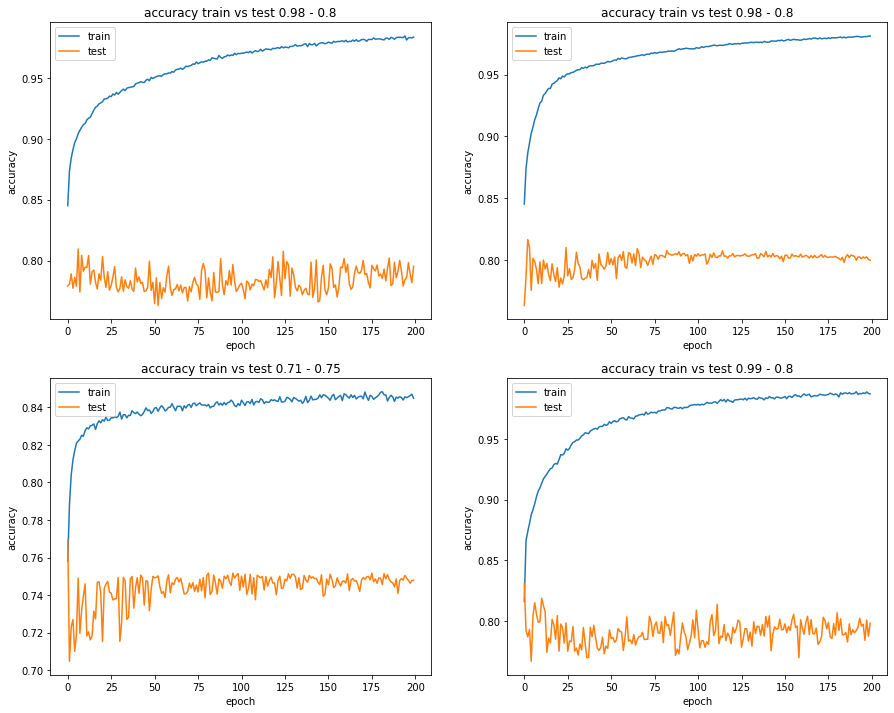

In [378]:
plot_x('accuracy','val_accuracy',1)

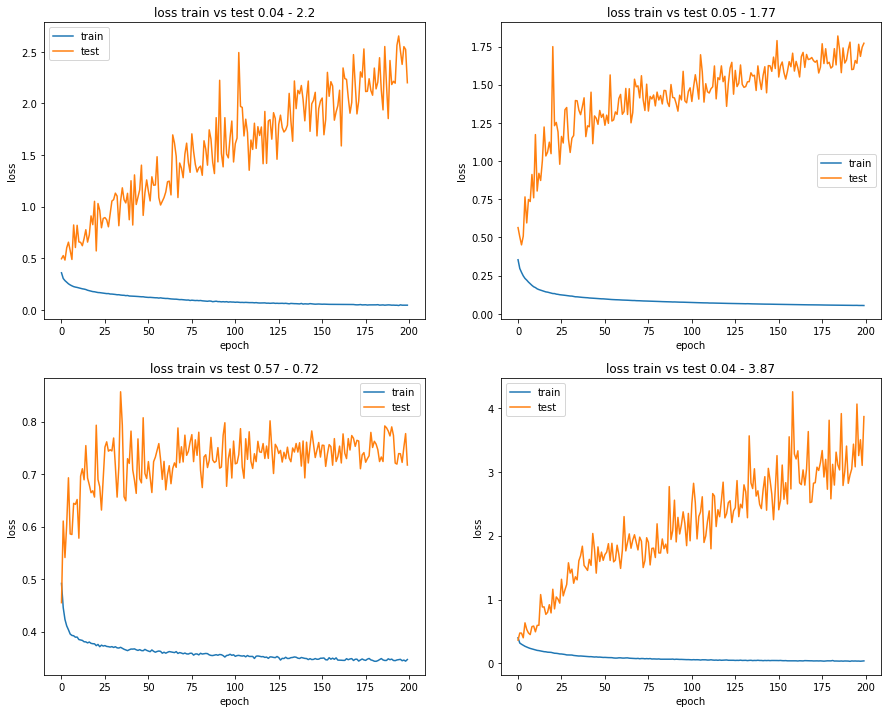

In [379]:
plot_x('loss','val_loss',0)